<style>
td {
  font-size: 20px
}
</style>

# Getting Started

With a partner, look at the code below and the resulting graph, then try to describe what you think is happening in each line.

In [1]:
gridsize = (3, 2)
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

NameError: name 'plt' is not defined

# Data Visualization with Matplotlib and Seaborn

Aims:
- Create and customize plots  using matplotlib 
____

Agenda today:
- Pylab and pyplot: which is which?
- Key concepts of matplotlib’s design
- Understanding plt.subplots()
- Introduction to matplotlib library in python for data visualization
    - barplots
    - histogram
    - scatter plot
    - pie chart

____

## Matplotlib can be very confusting

- The library itself is huge, at something like 70,000 total lines of code.
- Matplotlib is home to several different interfaces (ways of constructing a figure) and capable of interacting with a handful of different backends. (Backends deal with the process of how charts are actually rendered, not just structured internally.)
- While it is comprehensive, some of matplotlib’s own public documentation is seriously out-of-date. The library is still evolving, and many older examples floating around online may take 70% fewer lines of code in their modern version.
____

One of the main reasons for the confusion is because of the design of package and how it renders graphs.

`plt.plot([1,2,3])`

The one line of code here hides the larger heirarchy of nested Python objects that it creates.

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

<img src="fig_map.webp" alt="anatomy" title="Anatomy of Figure" width="650" />

Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:

<img src="anatomy.webp" alt="anatomy" title="Anatomy of Figure" width="650" />

<img src="empty_gridspec_annot.webp" alt="anatomy" title="Anatomy of Figure" width="650" />

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)
# %matplotlib notebook
%matplotlib inline
plt.style.use('seaborn')


<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


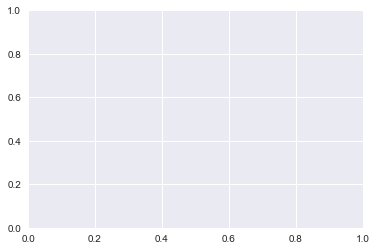

In [3]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

In [4]:
h

NameError: name 'h' is not defined

In [ ]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

In [ ]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng
fig, ax = plt.subplots(figsize=(8, 5))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(left=yrs[0], right=yrs[-1])
fig.tight_layout()

Here’s what’s going on above:

After creating three random time series, we defined one Figure (fig) containing one Axes (a plot, ax).

We call methods of ax directly to create a stacked area chart and to add a legend, title, and y-axis label. Under the object-oriented approach, it’s clear that all of these are attributes of ax.

tight_layout() applies to the Figure object as a whole to clean up whitespace padding.

In [ ]:
fig.savefig('plot.pdf')
plt.savefig('myfig')


In [ ]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [ ]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [ ]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

In [ ]:
help(plt.subplot2grid)

In [ ]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

In [ ]:
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')


In [ ]:
fig

## Part I. Matplotlib
The Matplotlib plotting library provides a range of built in functions to start visualizing data with minimum effort. Let's import the module pyplot in matplotlib as well as numpy to generate some data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Set plot space as inline for inline plots display
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# seaborn is not fully supported in python 3.7 and gives warning when we use it..so let's supress the warning 

### 1 Barplots
Barplots are used for displaying __one dimensional__, __discrete__ data. You call plt.bar with two arguments:
- the x — a list of x-positions for each bar
- the y-values — a list of heights for each bar

In [ ]:
# an example of a bar plot 
ax = plt.subplot() # create an axis object, which the plot object which we can customize
our_dogs = ["dengue", "dolce", "murray", "dog_a", "dog_b", "dog_c"] 
dogs_age =  [5, 8, 5, 4, 6, 7]

plt.bar(range(len(our_dogs)), dogs_age)

ax.set_xticks(range(0,len(our_dogs))) # set ticks values, as a method of the axes
ax.set_xticklabels(our_dogs) # set tick labels, also as a method of the axes

plt.title('age of dogs')
plt.xlabel('dogs')
plt.ylabel('age')
plt.show()

In [ ]:
# utilizing the subplot function and creating subplots
our_cats = ["cat_1", "cat_2", "cat_3", "cat_4", "cat_5", "cat_6"]
cats_age =  [14, 16, 17, 20, 18, 24]
fig = plt.figure(figsize = (8,10))
ax1 = plt.subplot(2,1,1)
plt.bar(range(len(our_dogs)),dogs_age, color = 'pink')
plt.title('dog age')
plt.subplot(2,1,2)
plt.bar(range(len(our_cats)),cats_age, color = 'green')
plt.title('cat age')


What is something that you notice here that needs to be fixed?

In [ ]:
# we can create overlaid or side-by-side bargraph. You need to shift the x value by width to accommodate for two graphs.
from matplotlib import pyplot as plt
fig = plt.figure()
n = 1 # This is our first dataset (out of 2) 
t = 2 # Number of datasets 
d = 6 # Number of sets of bars 
w = 0.8 # Width of each bar 
dog_values = [t*element + w*n for element in range(d)] # essentially, this list comprehension gives us the position
# of the position of dogs
plt.bar(dog_values,dogs_age, color='green')
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
cat_values = [t*element + w*n for element in range(d)]
plt.bar(cat_values, cats_age, color = 'purple')
plt.legend(["dogs", "cats"])
n = 1

In [ ]:
dog_values

In [ ]:
# stacked barplots 
ax = plt.subplot()
music_festivals = ["Coachella", "Govball", "EDC", "Ultra"]
ticket_sales_in_millon =  [114, 62, 120, 116]
people_attended_in_thousands = [126, 114 , 130, 110]

plt.bar(range(len(music_festivals)), ticket_sales_in_millon)
plt.bar(range(len(music_festivals)), people_attended_in_thousands, bottom=ticket_sales_in_millon)

plt.legend(["tix sales", "number of people"])
ax.set_xticks(range(0,len(music_festivals)))
ax.set_xticklabels(music_festivals)
plt.show()

### 2 Histogram
Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Comparison of barplots and histogram
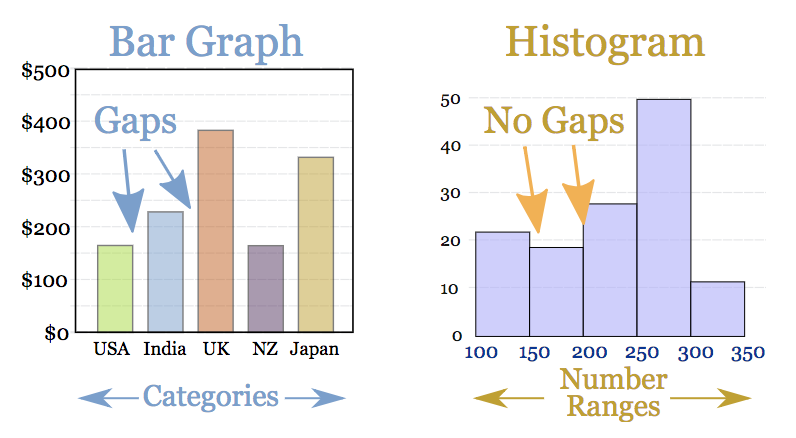

In [ ]:
# Set seed for reproducability
np.random.seed(2018)

# Generate 1000 values from 0 standard normal distribution
x = np.random.randn(100000)

#Plot the distogram with hist() function
plt.hist(x, bins = 2000)

plt.xlabel('Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

In [ ]:
# overlaid histograms for two distributions
# plotting two histograms 
mu1, sigma1 = 0, 0.1 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0.5, 0.1
s2 = np.random.normal(mu2, sigma2, 1000)
plt.figure(figsize = (10,8))
plt.hist(s1, bins = 20, density = True,)
plt.hist(s2, bins = 20, density = True,)

### 3. Scatterplot - visualizing two dimensional data
Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

In [ ]:
# generate some data -> the sine wave
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, label = "Function: sin(x)" )
plt.title('Scatter Plot in Matplotlib')
plt.legend()

In [ ]:
# examining correlation with height and weight 
height = [63,62,60,63,64,65,68,67,64,71,72,70,73]
weight = [120,115,114,119,125,130,135,140,128,140,150,165,180]
plt.scatter(height, weight,color = 'r')

Scatterplots, again, are great for examining the relationship between two variables. We can create pair-wise scatterplot for variables in a dataframe if we want to find their the correlations between variables. Later in this course, we will learn about correlation heatmap. 

### 3 - Pie Charts

In [ ]:
# pie chart 
music_genre = ['R&B', 'Rock', 'Country', 'House', 'Hip Pop', 'Techno']
num_people_like = [15, 5, 3, 7, 18, 3]

#Make your plot here
plt.figure(figsize=(10,8))
plt.pie(num_people_like ,labels=music_genre, autopct="%1d%%")

plt.axis('equal')
plt.title('Music Preference')

plt.show()
plt.savefig("music_pie_chart.jpeg")
# saves the image to the directory

In [ ]:
help(plt)

## Part II - Visualizing with Seaborn
Seaborn is built on top of matplotlib and provides various aesthetic visualization types, such as violin plots, correlation heatmap and such. Let's focus on kde plots, distplot and boxplots for now.

### 1. kde (kernel density estimation) plots

In [ ]:
import seaborn as sns
mu1, sigma1 = 0, 0.1 # mean and standard deviation
s1 = list(np.random.normal(mu1, sigma1, 100))
mu2, sigma2 = 0.5, 0.1
s2 = list(np.random.normal(mu2, sigma2, 100))
mu3, sigma3 = 1, 0.3
s3 = list(np.random.normal(mu3, sigma3, 100))
sns.kdeplot(s1, shade=True, label="dataset1")
sns.kdeplot(s2, shade=True, label="dataset2")
sns.kdeplot(s3, shade=True, label="dataset3")

In [ ]:
# If we pass a two dimensional dataset to the kde plot function, we will get a two dimensional rendition 
sns.kdeplot(s1,s2)

In [ ]:
sns.distplot(s1)
sns.distplot(s2)
sns.distplot(s3)

### 2. Boxplots
Boxplots are a very informative type of visualization tool because it allows us to know the distribution of the data. 
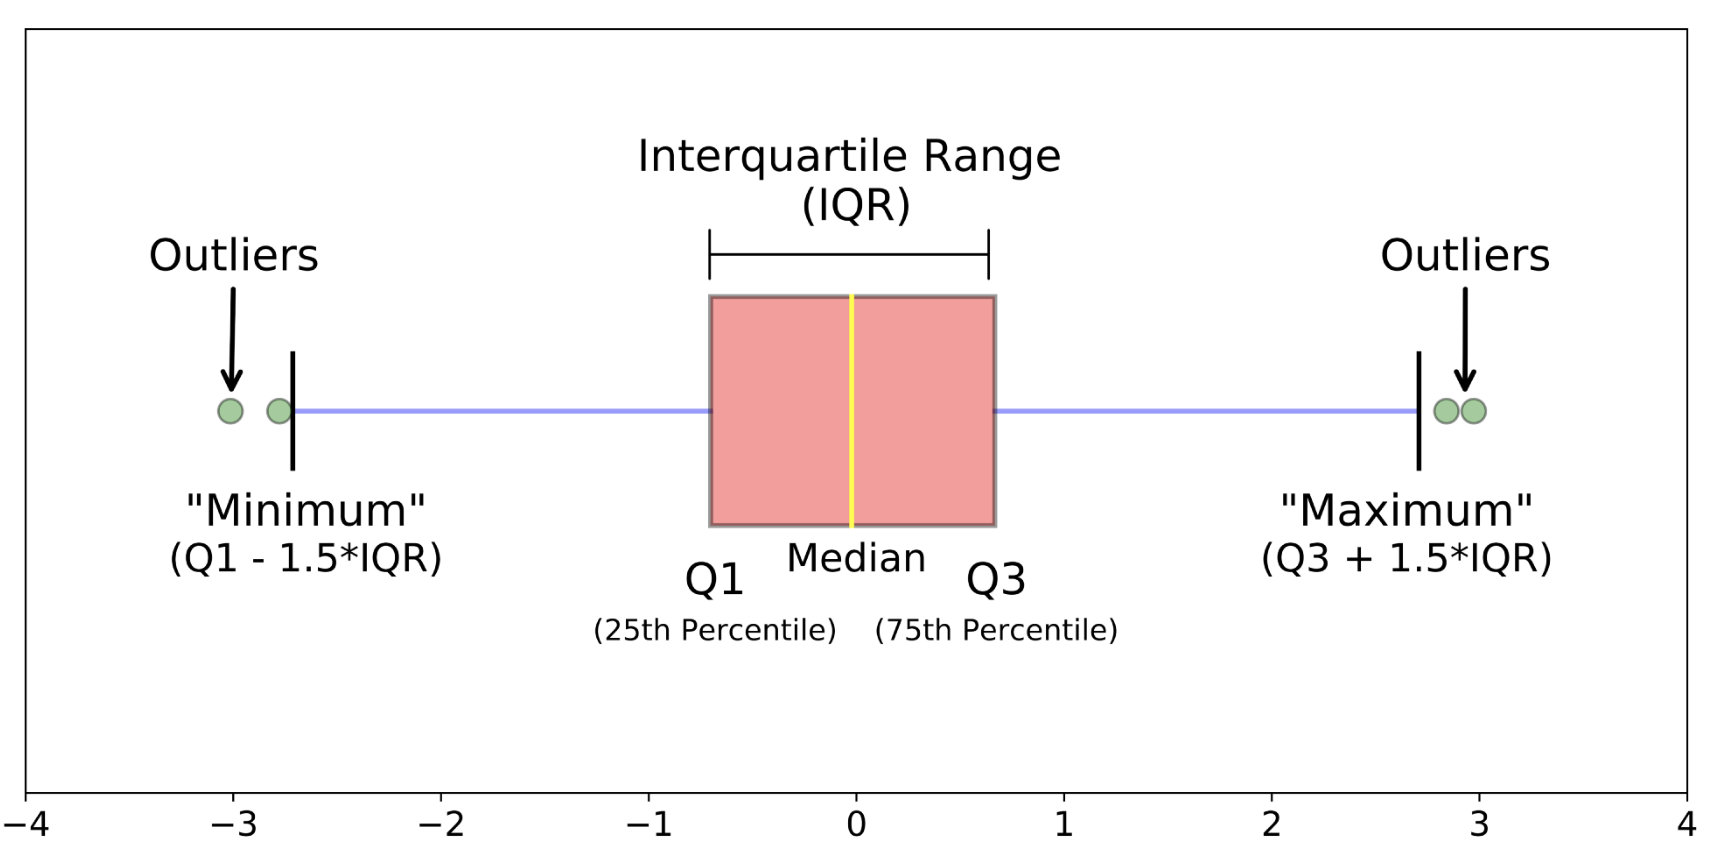

In [ ]:
iris = sns.load_dataset('iris')
iris.columns
iris.head()

In [ ]:
sns.boxplot(x = iris['species'], y = iris['sepal_length'])
plt.title('sepal length for different types of iris')

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

### Resources 
- [Matplotlib's Tutorials](https://matplotlib.org/tutorials/index.html)
- [Guide to Plotting with Matplotlib](https://realpython.com/python-matplotlib-guide/#why-can-matplotlib-be-confusing)
- [Coding Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[What is ax and figure?](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)